# CNN-MNIST

> based on: [Deep Learning: A Visual Approach - Chapter17-CNNs-1-MNIST](https://github.com/blueberrymusic/Deep-Learning-A-Visual-Approach/blob/main/Notebooks/Chapter17-ConvnetsInPractice/Chapter17-CNNs-1-MNIST.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Metal device set to: Apple M1 Max


2022-11-28 17:22:41.878176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 17:22:41.878291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [5]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/12


2022-11-28 17:22:42.042391: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-28 17:22:42.217789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2151 - accuracy: 0.9350

2022-11-28 17:22:47.569227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 0.2151 - accuracy: 0.9350 - val_loss: 0.0474 - val_accuracy: 0.9840
Epoch 2/12
469/469 [==============================] - 5s 12ms/step - loss: 0.0725 - accuracy: 0.9782 - val_loss: 0.0360 - val_accuracy: 0.9871
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0324 - val_accuracy: 0.9895
Epoch 4/12
469/469 [==============================] - 5s 12ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0271 - val_accuracy: 0.9907
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 7/12
469/469 [==============================] - 6s 12ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 8/12

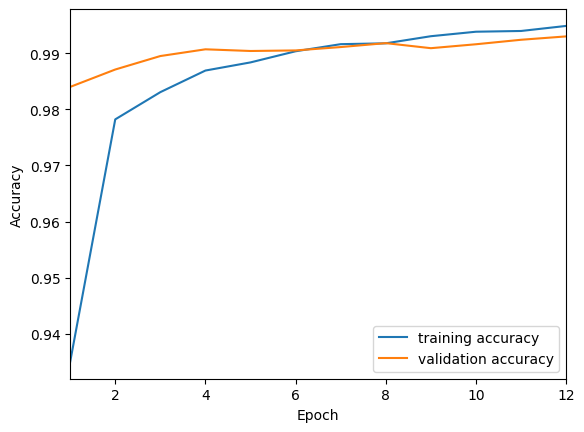

In [6]:
xs = list(range(1, 1 + len(history.history["accuracy"])))
plt.plot(xs, history.history["accuracy"], label="training accuracy")
plt.plot(xs, history.history["val_accuracy"], label="validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(1, len(xs))
plt.show()

2022-11-28 17:23:50.895011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


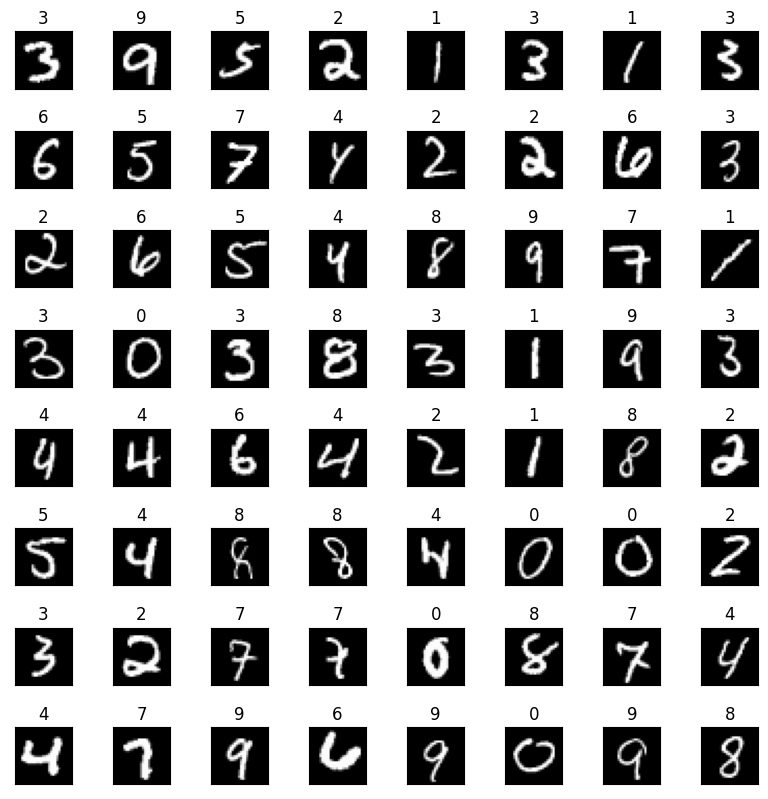

In [7]:
grid_x = 8
grid_y = 8
plt.figure(figsize=(1 * grid_x, 2 * grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2 * grid_y, grid_x, 1 + plt_index)
        img_index = index + 500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index], (28, 28)), cmap="gray")
        plt.xticks([], [])
        plt.yticks([], [])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()